In [1]:
from FK import *
import pyvoro
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
%matplotlib widget

## Evaluate the Voronoi cell size

In [3]:
def area_vertices(vertices):
    f_cm = np.mean(vertices,axis=0)
    vertices = vertices - f_cm
    i_1 = np.arange(len(vertices))
    i_2 = (i_1+1)%len(i_1)
    A = [np.cross(vertices[i_1[j]],vertices[i_2[j]]) for j in range(len(i_1))]
    area = np.linalg.norm(np.sum(A,axis=0)/2)
    return area

In [7]:
# Generate a FK C14 primitive unit cell
bounds = np.array([[0,1],[0,np.sqrt(3)],[0,np.sqrt(8/3)]])
points = C14_unit([0,0,0])

# Call pyvoro.compute_voronoi function to evaluate the Voronoi tessellations
voro = pyvoro.compute_voronoi(points,bounds,0.5,periodic=[True]*3)

list_origin = [v['original'] for v in voro]
list_volume = [v['volume'] for v in voro]
list_volume_round = [np.round(v['volume'],decimals=9) for v in voro]
list_vertices = [v['vertices'] for v in voro]
list_adjacency = [v['adjacency'] for v in voro]
list_faces = [v['faces'] for v in voro]
list_coords = [len(v['faces']) for v in voro]

# Pick up the unique elements from the list of Voronoi cell volume
unique_volume, inices, counts = np.unique(list_volume_round,return_counts=True,return_index=True)
unique_volume_reduced = unique_volume*np.sum(counts)/np.sum(counts*unique_volume)
unique_adjacency = np.array(list_coords)[inices]

# list of reduced cell volumes
list_volume_reduced = np.array(list_volume)*np.sum(counts)/np.sum(counts*unique_volume) 

# Isoperimetric quotient (IQ)
unique_IQ = []
for i_cell in range(len(unique_volume)):
    vertices = np.array(list_vertices[inices.tolist()[i_cell]])
    v_cm = np.mean(vertices,axis=0)
    vertices = vertices-v_cm
    faces = list_faces[inices.tolist()[i_cell]]

    area_sum = 0
    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        area = area_vertices(vertices_face_list)
        area_sum += area
        
    unique_IQ.append(36*np.pi*unique_volume[i_cell]**2/area_sum**3)

# Print the results
print('------------------')
print('\nCounts    Volume    Coordinates    IQ')
for i in range(len(counts)):
    print('{:d}         {:0.4f}    {:d}             {:0.4f}'.format(counts[i], 
                                                unique_volume_reduced[i], 
                                                unique_adjacency[i],
                                                unique_IQ[i]))
    
print('\nUnit cell volume \n{:0.4f}\n'.format(sum(counts*unique_volume_reduced)))

------------------

Counts    Volume    Coordinates    IQ
16         0.9288    12             0.7369
8         1.1423    16             0.8101

Unit cell volume 
24.0000



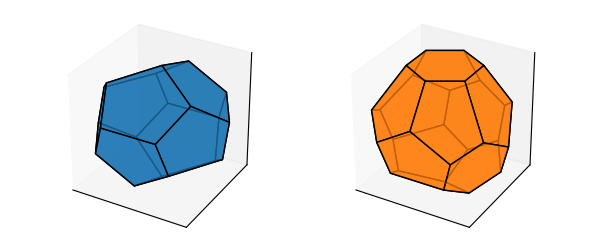

In [8]:
# Generate a FK C14 primitive unit cell
bounds = np.array([[0,1],[0,np.sqrt(3)],[0,np.sqrt(8/3)]])*2
points = C14(2,2,2)

# Call pyvoro.compute_voronoi function to evaluate the Voronoi tessellations
voro = pyvoro.compute_voronoi(points,bounds,0.7,periodic=[True]*3)

list_origin = [v['original'] for v in voro]
list_volume = [v['volume'] for v in voro]
list_volume_round = [np.round(v['volume'],decimals=9) for v in voro]
list_vertices = [v['vertices'] for v in voro]
list_adjacency = [v['adjacency'] for v in voro]
list_faces = [v['faces'] for v in voro]
list_coords = [len(v['faces']) for v in voro]

# Pick up the unique elements from the list of Voronoi cell volume
unique_volume, inices, counts = np.unique(list_volume_round,return_counts=True,return_index=True)
unique_volume_reduced = unique_volume*np.sum(counts)/np.sum(counts*unique_volume)
unique_adjacency = np.array(list_coords)[inices]

# list of reduced cell volumes
list_volume_reduced = np.array(list_volume)*np.sum(counts)/np.sum(counts*unique_volume) 
    
fig = plt.figure(figsize=(6,2.5))
colors = ['C0','C1','C2','C3','C4']
box_size = 0.3

for i_cell in range(len(unique_volume)):
    ax = fig.add_subplot(1, 2, i_cell+1, projection='3d')
    ax.set_box_aspect([1,1,1])

    vertices = np.array(list_vertices[inices.tolist()[i_cell]])
    v_cm = np.mean(vertices,axis=0)
    vertices = vertices-v_cm
    faces = list_faces[inices.tolist()[i_cell]]

    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        pgs = [list(tuple(x for x in v) for v in vertices_face_list)]
        collection_v = Poly3DCollection(pgs, 
                                        facecolors=colors[i_cell], linewidths=1, edgecolors='k', alpha=.75)

        ax.add_collection3d(collection_v)

    
    ax.set_xlim(-box_size,box_size)
    ax.set_ylim(-box_size,box_size)
    ax.set_zlim(-box_size,box_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()

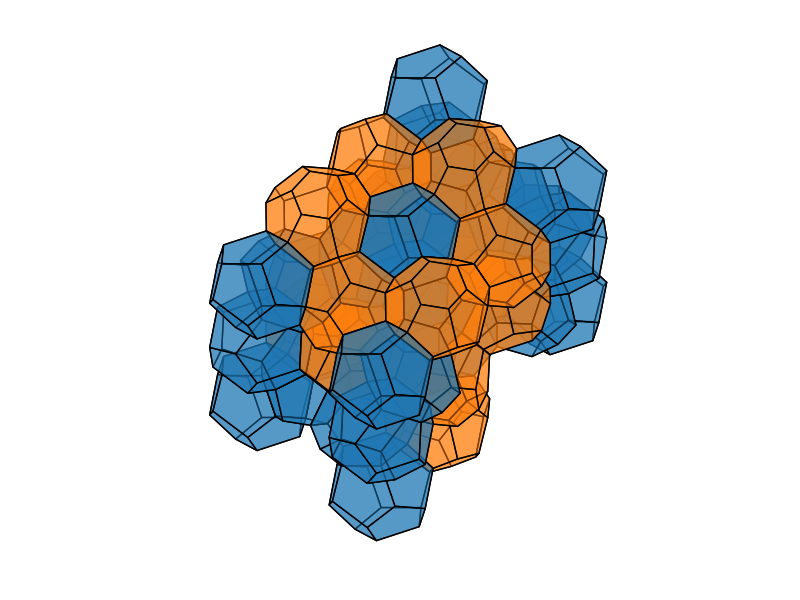

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_box_aspect([1,np.sqrt(3),np.sqrt(8/3)])

for i_cell in range(len(points)):
    if points[i_cell,0]>1*1.1:
        continue
    if points[i_cell,1]>1*np.sqrt(3)*1.1:
        continue
    if points[i_cell,2]>=np.sqrt(8/3)*1.1:
        continue
    vertices = np.array(list_vertices[i_cell])
    v_cm = np.mean(vertices,axis=0)
    vertices = vertices
    faces = list_faces[i_cell]
    volume = list_volume_reduced[i_cell]
    i_type = np.argmin(np.abs(unique_volume_reduced-volume))

    # ax.plot(points[i_cell,0],points[i_cell,1],points[i_cell,2],'k.',markersize=10)

    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        pgs = [list(tuple(x for x in v) for v in vertices_face_list)]
        collection_v = Poly3DCollection(pgs, 
                                        facecolors=colors[i_type], linewidths=1, edgecolors='k', alpha=.5)

        ax.add_collection3d(collection_v)

# ax.plot([0,l,l,0,0],[0,0,l,l,0],[0,0,0,0,0],'-k',lw=2)
# ax.plot([0,l,l,0,0],[0,0,l,l,0],[l_c,l_c,l_c,l_c,l_c],'-k',lw=2)
# ax.plot([0,0,0,0,0],[0,0,l,l,0],[0,l_c,l_c,0,0],'-k',lw=2)
# ax.plot([l,l,l,l,l],[0,0,l,l,0],[0,l_c,l_c,0,0],'-k',lw=2)

ax.set_xlim(0-1/5,1+1/5)
ax.set_ylim(0-1*np.sqrt(3)/5,1*np.sqrt(3)+1*np.sqrt(3)/5)
ax.set_zlim(0-np.sqrt(8/3)/5,np.sqrt(8/3)+np.sqrt(8/3)/5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=64, azim=-50)
ax.set_proj_type('ortho')
ax.axis('off')

plt.tight_layout()
plt.show()